## K-means Clustering in Cricket dataset

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

In [29]:
data=pd.read_excel("C:\\Users\\anike\\OneDrive\\Desktop\\ML-IIT(ROORKEE)\\CRICKETERS_DATA.xlsx")

In [30]:
data.head(2)

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,TEST
1,147,143,5238,39.68,85.25,ODI


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Mat       75 non-null     int64  
 1   Inns      75 non-null     int64  
 2   Runs      75 non-null     int64  
 3   Ave       75 non-null     float64
 4   SR        75 non-null     float64
 5   CATEGORY  75 non-null     object 
dtypes: float64(2), int64(3), object(1)
memory usage: 3.6+ KB


In [32]:
data.duplicated().sum()

0

In [33]:
data.describe()

,Mat,Inns,Runs,Ave,SR
count,75.000000,75.000000,75.000000,75.000000,75.000000
mean,93.253333,104.960000,3958.706667,38.392267,90.918400
std,76.785432,79.784412,3585.083627,13.147980,32.969055
min,4.000000,4.000000,61.000000,10.750000,26.700000
25%,46.500000,55.000000,1483.000000,30.870000,58.665000
50%,74.000000,86.000000,2779.000000,37.540000,87.180000
75%,111.500000,140.000000,6029.500000,46.575000,120.995000
max,463.000000,452.000000,18426.000000,99.940000,161.530000


<Figure size 1500x1000 with 0 Axes>

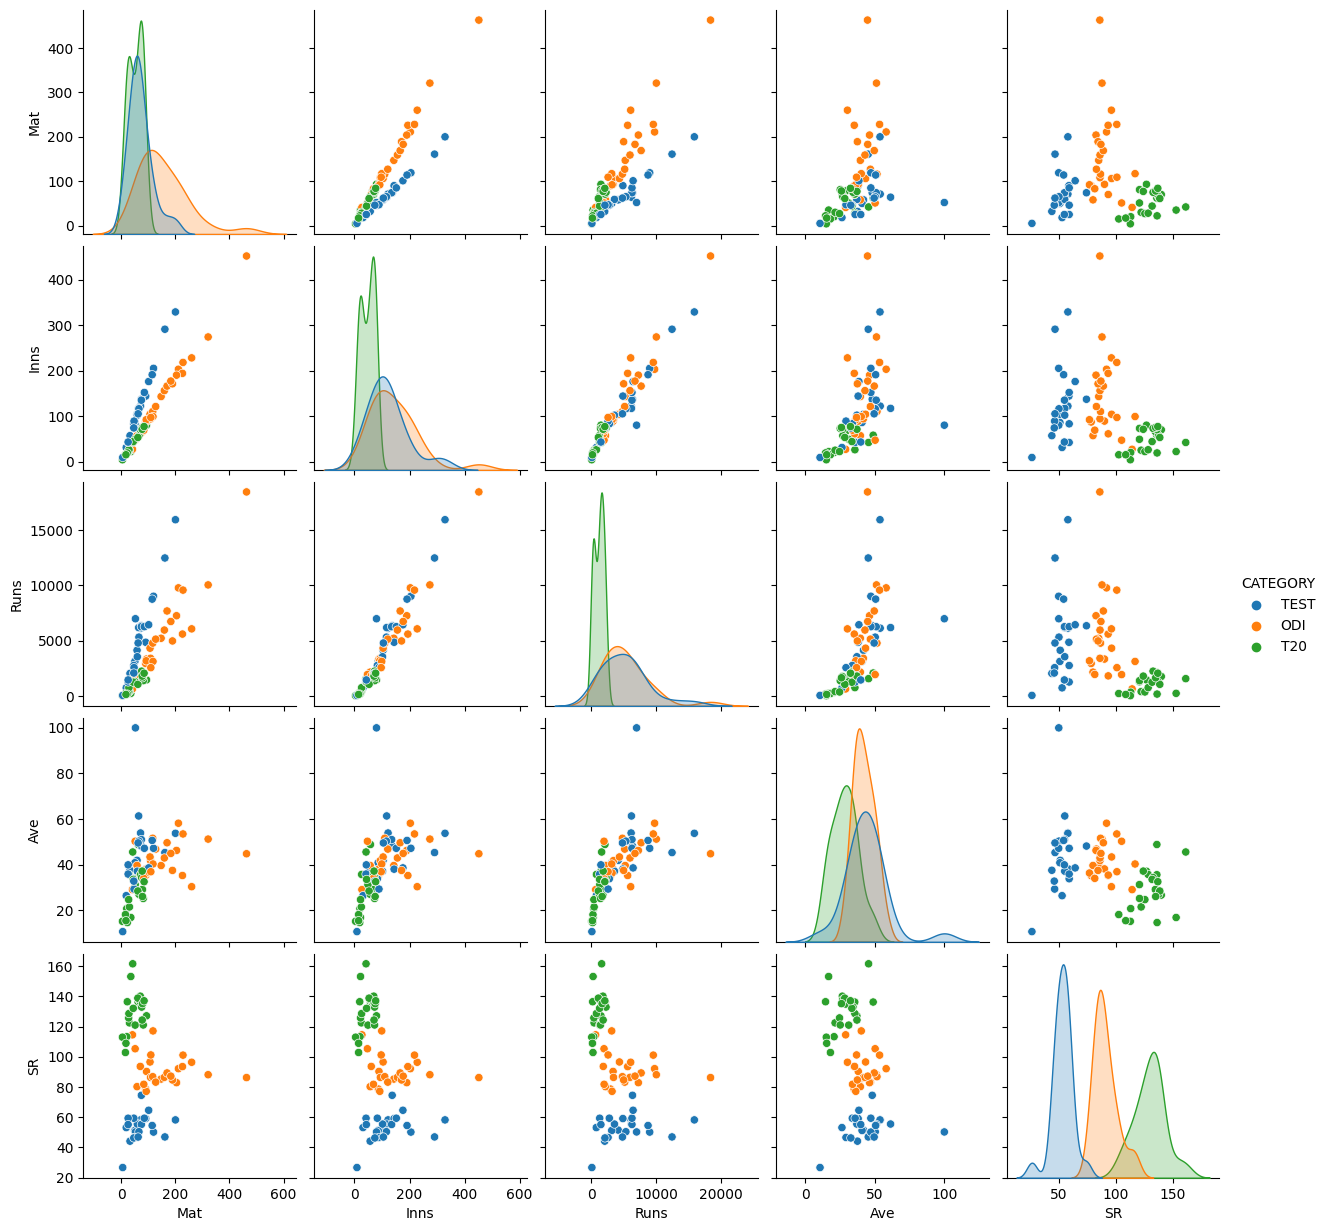

In [34]:
plt.figure(1,figsize=(15,10))
sb.pairplot(data=data,hue="CATEGORY")
plt.show()

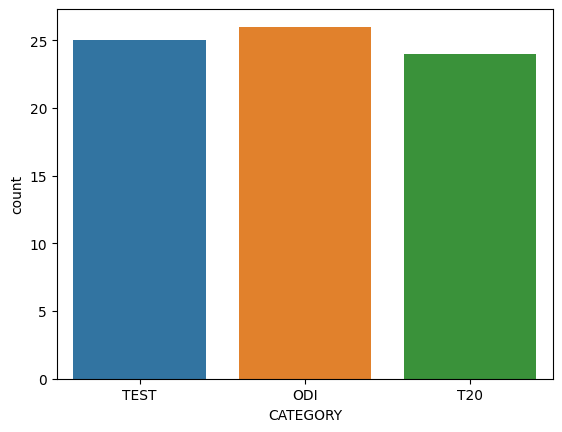

In [35]:
sb.countplot(x="CATEGORY",data=data)
plt.show()

### Encoding 

In [36]:
data.dtypes

Mat           int64
Inns          int64
Runs          int64
Ave         float64
SR          float64
CATEGORY     object
dtype: object

In [37]:
data["CATEGORY"]=data["CATEGORY"].map({'TEST':0,'ODI':1,'T20':2})

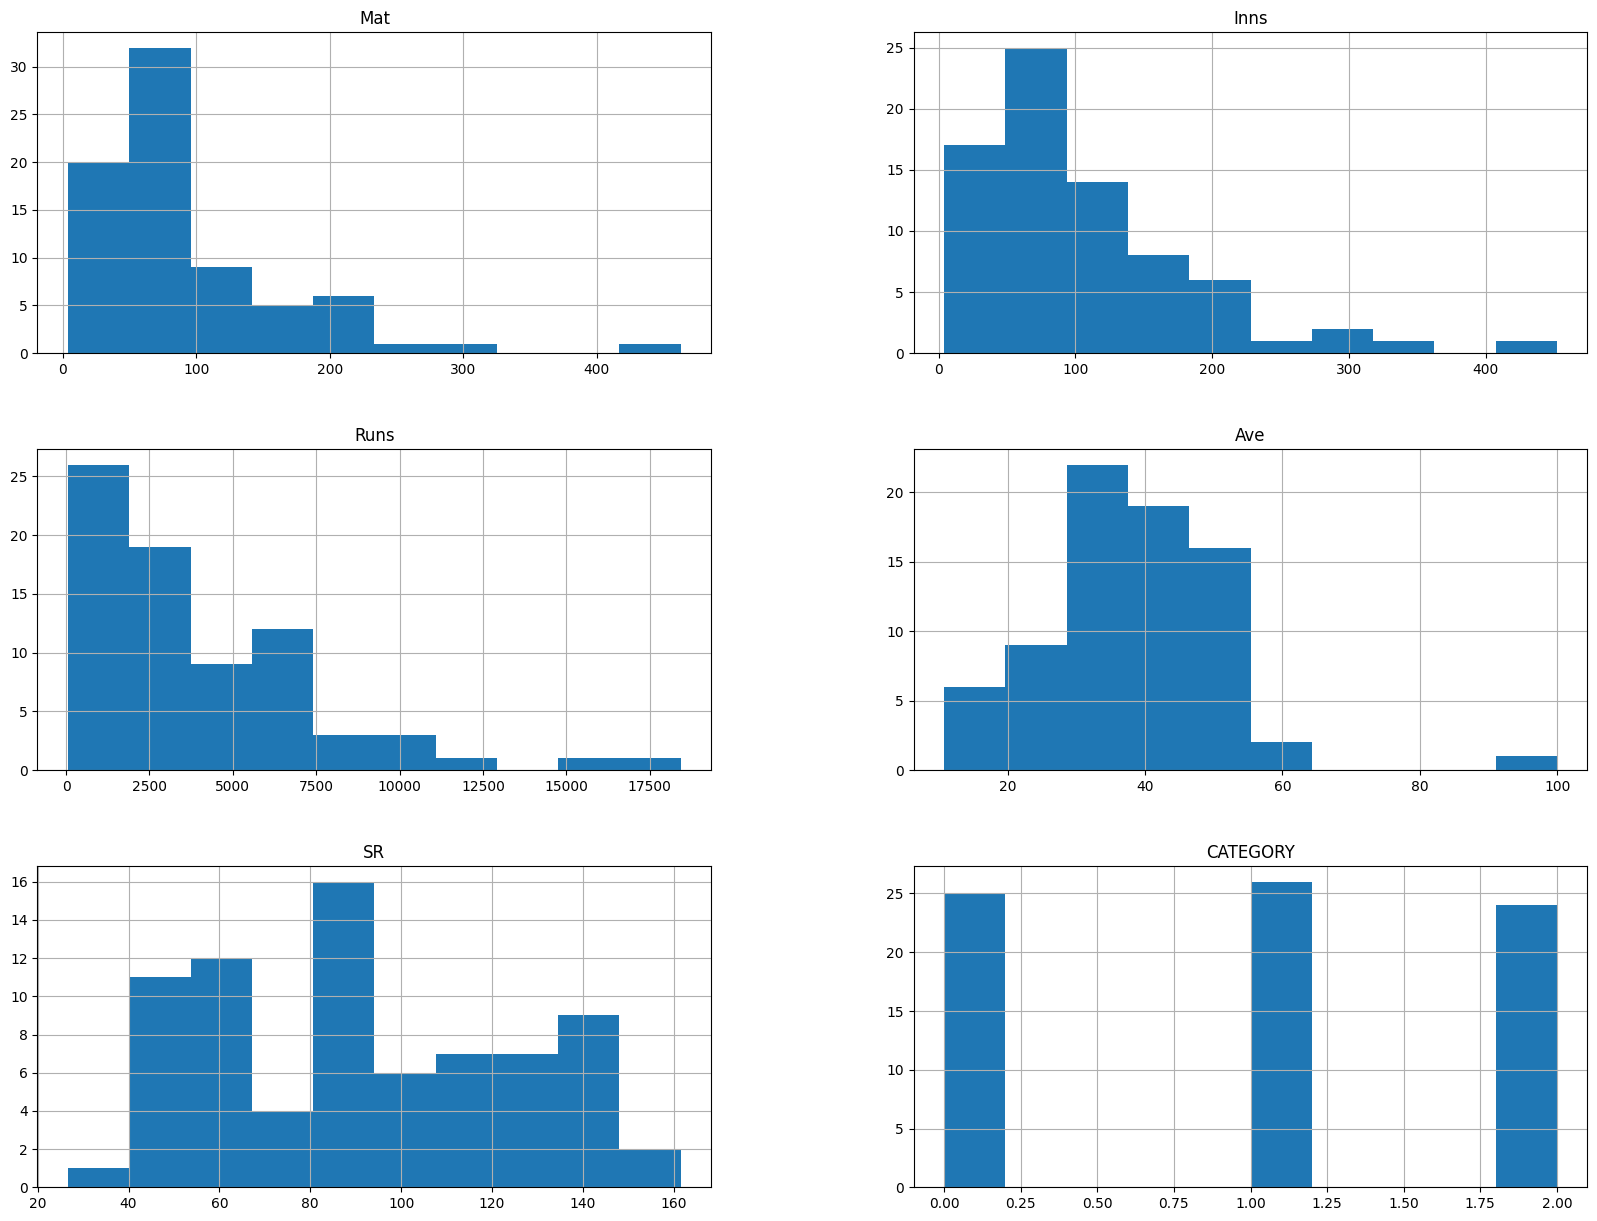

In [38]:
data.hist(figsize=(20,15))
plt.show()

### Clustering

In [39]:
k_cluster_model=KMeans(n_clusters=6)
learner=k_cluster_model.fit(data)

C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [40]:
learner.inertia_

32642137.863494568

In [41]:
data.head(1)

,Mat,Inns,Runs,Ave,SR,CATEGORY
0,58,104,4154,41.95,51.49,0


In [42]:
k=int(np.sqrt(len(data)))

In [43]:
k_rrange=range(1,k+1)

In [44]:
n_CLUSTER=list(k_rrange)

In [45]:
learner.cluster_centers_

array([[6.18260870e+01, 6.12173913e+01, 1.73160870e+03, 3.50134783e+01,
        1.12255652e+02, 1.47826087e+00],
       [1.92333333e+02, 2.30333333e+02, 9.94350000e+03, 5.10316667e+01,
        7.21616667e+01, 5.00000000e-01],
       [1.25900000e+02, 1.47000000e+02, 5.96570000e+03, 4.81830000e+01,
        7.24785000e+01, 5.00000000e-01],
       [3.31500000e+02, 3.90500000e+02, 1.71735000e+04, 4.93050000e+01,
        7.22250000e+01, 5.00000000e-01],
       [2.18333333e+01, 1.95833333e+01, 3.73083333e+02, 2.08250000e+01,
        1.08216667e+02, 1.58333333e+00],
       [8.12500000e+01, 9.38333333e+01, 3.27308333e+03, 3.79791667e+01,
        7.59508333e+01, 5.83333333e-01]])

In [46]:
wss=[]
for i in range(len(n_CLUSTER)):
    kval=n_CLUSTER[i]
    #print(kval)
    model_kmean=KMeans(n_clusters=kval)
    learner_model=model_kmean.fit(data)
    error=learner_model.inertia_
    wss.append(error)
    print(f"k value is {kval} and error is {error}")
    

k value is 1 and error is 952109652.8671227
k value is 2 and error is 353130743.06643414
k value is 3 and error is 136646165.23659107
k value is 4 and error is 75884230.1352381
k value is 5 and error is 45725078.86976197
k value is 6 and error is 31611875.855273332
k value is 7 and error is 21613508.425881233
k value is 8 and error is 13935137.2678479


C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\anike\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

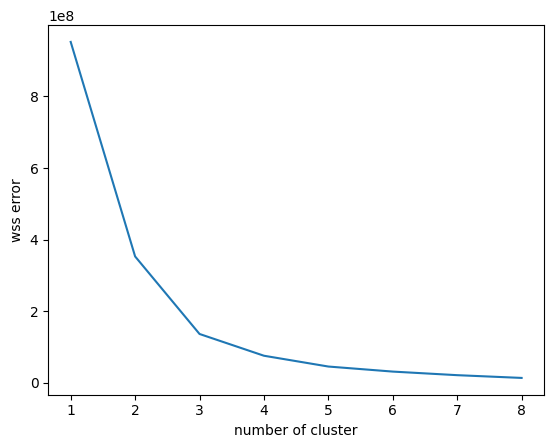

In [47]:
plt.plot(n_CLUSTER,wss)
plt.xlabel("number of cluster")
plt.ylabel("wss error")
plt.show()

In [48]:
learner.labels_

array([5, 2, 2, 1, 0, 3, 3, 4, 4, 2, 1, 0, 5, 5, 4, 4, 2, 0, 0, 0, 4, 5,
       0, 2, 5, 4, 2, 2, 5, 0, 5, 0, 4, 1, 5, 4, 2, 2, 4, 5, 0, 4, 0, 5,
       0, 2, 2, 0, 2, 2, 0, 2, 2, 0, 5, 2, 0, 4, 0, 4, 1, 2, 0, 5, 0, 1,
       1, 0, 0, 2, 0, 2, 0, 2, 0])

In [49]:
data["Cluster"]=learner.labels_

In [50]:
data["Cluster"]=data["Cluster"].map({0:"C1",1:"C2",2:"C3",3:"C4",4:"C5",5:"C6"})

<Figure size 1500x1000 with 0 Axes>

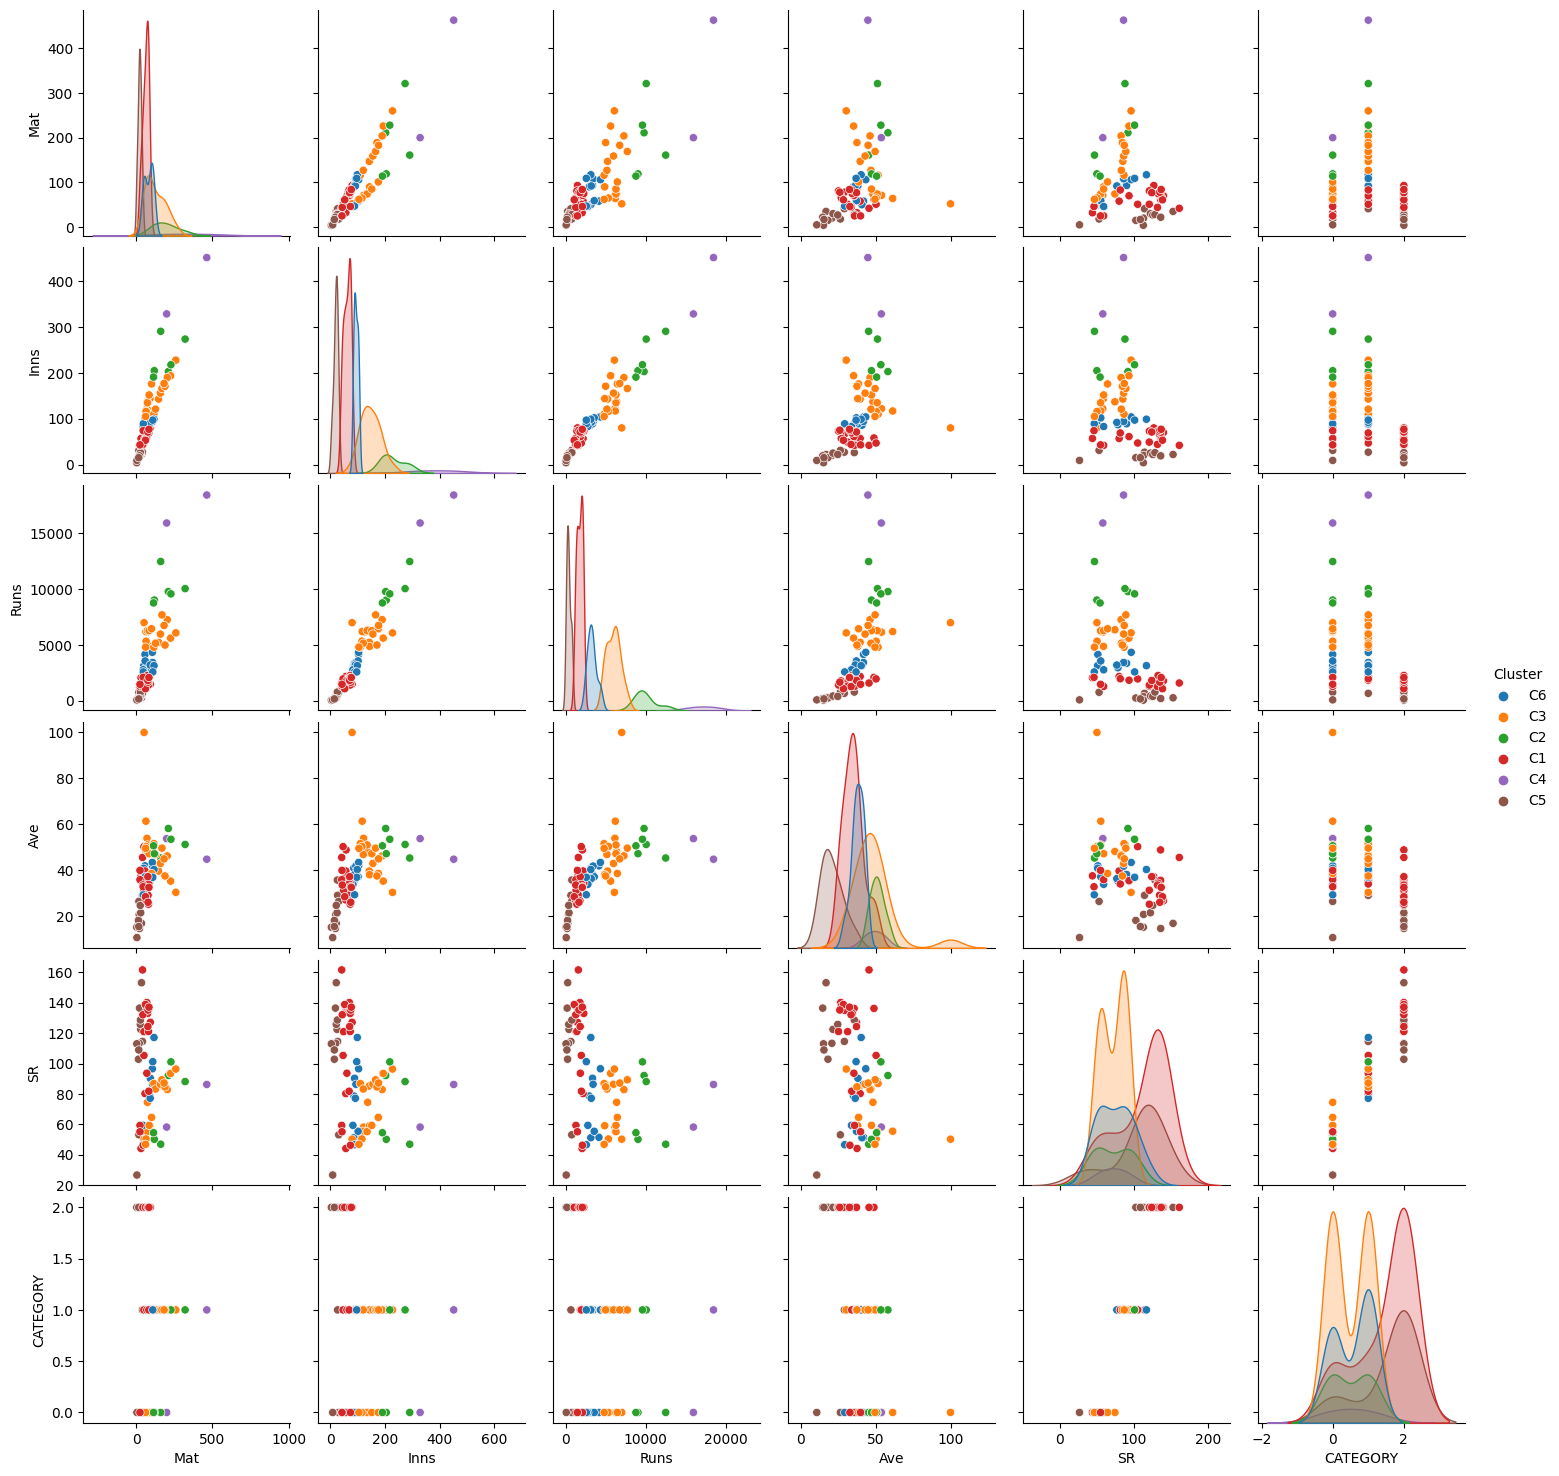

In [51]:
plt.figure(1,figsize=(15,10))
sb.pairplot(data=data,hue="Cluster")
plt.show()